In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [106]:
df=pd.read_csv("/content/bestsellers with categories.csv")

In [107]:
# Get the first 5 rows of the spreadsheet
print(df.head())

# Get the shape of the spreadsheet
print(df.shape)

# Get the column names of the spreadsheet
print(df.columns)

# Get summary statistics for each column
print(df.describe())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
(550, 7)
Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')
       User Rating       Reviews       Price         Year
count   550.000000    550.000000  

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [109]:
df.drop_duplicates(inplace=True)

In [110]:
df.rename(columns={"Name": "Title", "Year": "Publication Year", "User Rating": "Rating"}, inplace=True)

In [111]:
df["Price"] = df["Price"].astype(float)

In [112]:
df["Reviews"] = df["Reviews"].astype(int)

In [113]:
df.sample(5)

,Title,Author,Rating,Reviews,Price,Publication Year,Genre
152,"Happy, Happy, Happy: My Life and Legacy as the...",Phil Robertson,4.8,4148,11.0,2013,Non Fiction
374,The Five Love Languages: How to Express Heartf...,Gary Chapman,4.6,803,9.0,2009,Non Fiction
359,The Daily Show with Jon Stewart Presents Earth...,Jon Stewart,4.4,440,11.0,2010,Non Fiction
222,"Love Wins: A Book About Heaven, Hell, and the ...",Rob Bell,4.2,1649,13.0,2011,Non Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4.0,2015,Non Fiction


In [114]:
df.isna().sum()

,0
Title,0
Author,0
Rating,0
Reviews,0
Price,0
Publication Year,0
Genre,0


In [115]:
df["Author"].value_counts()

,count
Author,
Jeff Kinney,12
Suzanne Collins,11
Gary Chapman,11
Rick Riordan,11
American Psychological Association,10
...,...
Maurice Sendak,1
Cheryl Strayed,1
The Staff of The Late Show with,1


<Axes: title={'center': 'Top 10 Authors with Highest No. of Books'}, xlabel='Author'>

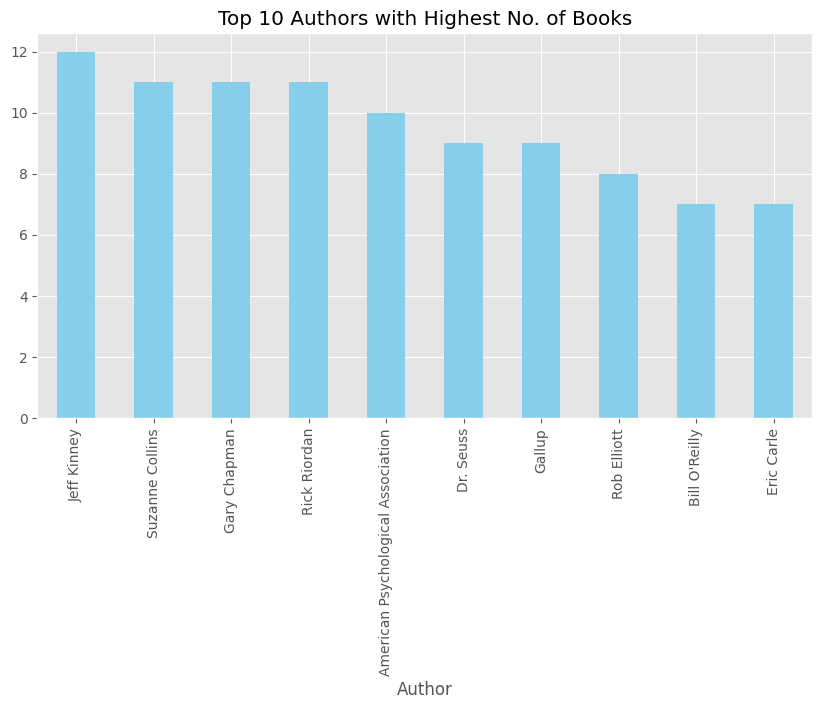

In [116]:
#Top 10 Authors with Highest No. of Books
df["Author"].value_counts().head(10).plot(kind="bar",figsize=(10,5),color="skyblue",y="count",title="Top 10 Authors with Highest No. of Books")

In [117]:
df["Publication Year"].value_counts()

,count
Publication Year,
2016,50
2011,50
2018,50
2017,50
2019,50
2014,50
2010,50
2009,50
2015,50


In [118]:
df.sample(5)

,Title,Author,Rating,Reviews,Price,Publication Year,Genre
232,Milk and Vine: Inspirational Quotes From Class...,Adam Gasiewski,4.4,3113,6.0,2017,Non Fiction
90,Drive: The Surprising Truth About What Motivat...,Daniel H. Pink,4.5,2525,16.0,2010,Non Fiction
122,George Washington's Secret Six: The Spy Ring T...,Brian Kilmeade,4.6,4799,16.0,2013,Non Fiction
352,The Boys in the Boat: Nine Americans and Their...,Daniel James Brown,4.8,23358,12.0,2015,Non Fiction
336,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16.0,2016,Non Fiction


In [119]:
df.groupby("Genre") ["Title"].count()

,Title
Genre,
Fiction,240
Non Fiction,310


<Axes: title={'center': 'Fiction Vs Non-Fiction: By Genre'}, xlabel='Genre'>

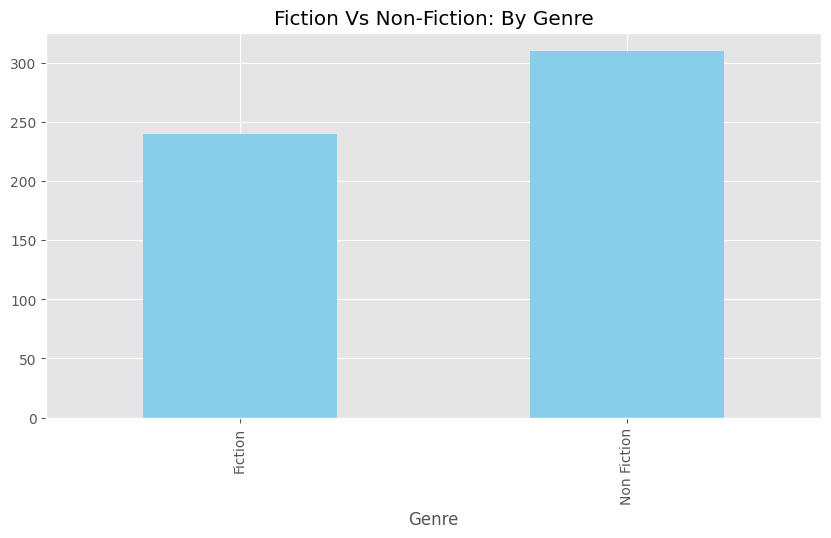

In [120]:
#plotting Fiction and Non-Fiction: By Genre
df.groupby("Genre")["Title"].count().head(10).plot(kind="bar",figsize=(10,5),color="skyblue",y="count",title="Fiction Vs Non-Fiction: By Genre")

In [121]:
df["Price"].value_counts()

,count
Price,
8.0,52
6.0,38
9.0,38
5.0,36
11.0,35
4.0,32
14.0,30
13.0,29
10.0,28


In [122]:
df.groupby("Genre") ["Price"].mean()

,Price
Genre,
Fiction,10.850000
Non Fiction,14.841935


<Axes: title={'center': 'Average Price of a Book: By Genre'}, xlabel='Genre'>

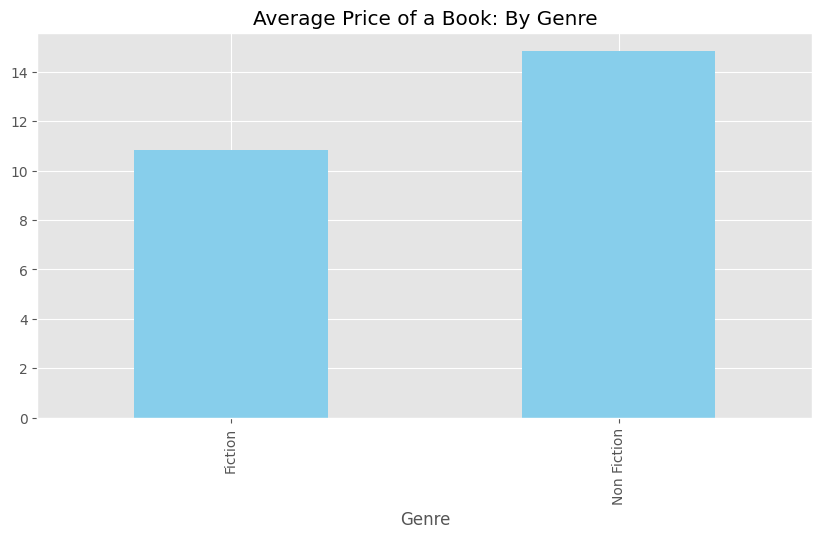

In [123]:
#Average Price of a Book: By Genre
df.groupby("Genre")["Price"].mean().head(10).plot(kind="bar",figsize=(10,5),color="skyblue",y="average price",title="Average Price of a Book: By Genre")

In [124]:
df.groupby("Price")["Title"].unique()

,Title
Price,
0.0,"[Cabin Fever (Diary of a Wimpy Kid, Book 6), D..."
1.0,[Eat This Not That! Supermarket Survival Guide...
2.0,[A Patriot's History of the United States: Fro...
3.0,"[A Higher Loyalty: Truth, Lies, and Leadership]"
4.0,[Adult Coloring Book Designs: Stress Relief Co...
5.0,"[A Wrinkle in Time (Time Quintet), Arguing wit..."
6.0,"[1984 (Signet Classics), Adult Coloring Book: ..."
7.0,"[Eclipse (Twilight Sagas), Fifty Shades Darker..."
8.0,"[10-Day Green Smoothie Cleanse, A Man Called O..."


In [125]:
for item in df.groupby("Price")["Title"].unique():
  print(type(item))
  for inner_item in item:
    print(inner_item)
    print('\n')
  break

<class 'numpy.ndarray'>
Cabin Fever (Diary of a Wimpy Kid, Book 6)


Diary of a Wimpy Kid: Hard Luck, Book 8


Frozen (Little Golden Book)


JOURNEY TO THE ICE P


Little Blue Truck


The Constitution of the United States


The Getaway


The Short Second Life of Bree Tanner: An Eclipse Novella (The Twilight Saga)


To Kill a Mockingbird




In [126]:
df["Rating"].value_counts()

,count
Rating,
4.8,127
4.7,108
4.6,105
4.5,60
4.9,52
4.4,38
4.3,25
4.0,14
4.2,8


<Axes: title={'center': 'Number of User Ratings'}, xlabel='Rating'>

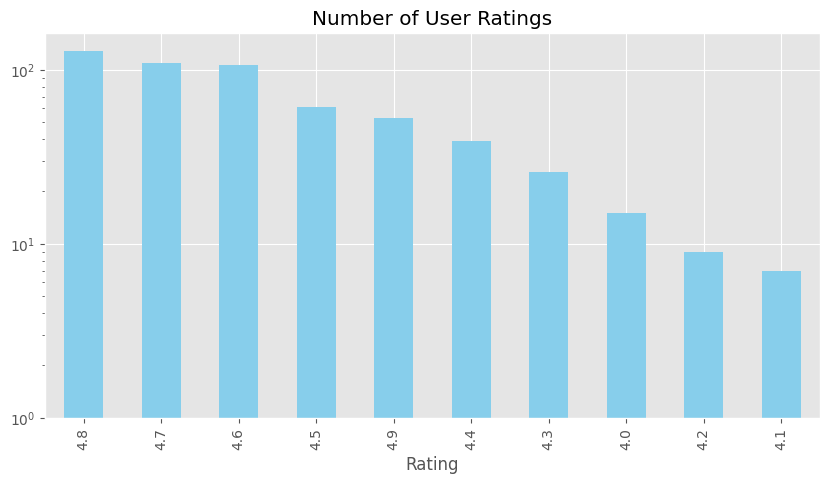

In [127]:
#Number of User Ratings
df["Rating"].value_counts().head(10).plot(kind="bar",figsize=(10,5),color="skyblue",y="count",title="Number of User Ratings",log=True)

In [128]:
df.drop(columns=["Publication Year"], inplace=True)

In [129]:
df[(df["Rating"] >= 4.8) & (df["Reviews"] >= 10000) & (df["Genre"] == "Non Fiction") & (df["Price"] < 20)]

,Title,Author,Rating,Reviews,Price,Genre
32,Becoming,Michelle Obama,4.8,61133,11.0,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11.0,Non Fiction
34,Being Mortal: Medicine and What Matters in the...,Atul Gawande,4.8,11113,15.0,Non Fiction
44,Can't Hurt Me: Master Your Mind and Defy the Odds,David Goggins,4.8,16244,18.0,Non Fiction
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8.0,Non Fiction
188,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8.0,Non Fiction
189,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8.0,Non Fiction
190,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8.0,Non Fiction
191,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8.0,Non Fiction
192,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8.0,Non Fiction


In [135]:
df[(df["Rating"] >= 4.8) & (df["Reviews"] >= 10000) & (df["Genre"] == "Non Fiction") & (df["Price"] < 20)] \
.groupby("Rating")["Price"].mean()

,Price
Rating,
4.8,11.7
4.9,8.0


Among non-fiction books priced below $20, those with ratings of 4.8 or higher and more than 10,000 reviews show the following average prices:

Books rated 4.8 are priced on average at $11.70.

Books rated 4.9 are priced on average at $8.00.

In [137]:
df.sort_values("Reviews",ascending= False). head(10)

,Title,Author,Rating,Reviews,Price,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15.0,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18.0,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7.0,Fiction
33,Becoming,Michelle Obama,4.8,61133,11.0,Non Fiction
32,Becoming,Michelle Obama,4.8,61133,11.0,Non Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10.0,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10.0,Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9.0,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13.0,Fiction
365,The Fault in Our Stars,John Green,4.7,50482,13.0,Fiction


<Axes: title={'center': 'Top 10 Books with Most Reviews'}, xlabel='Title'>

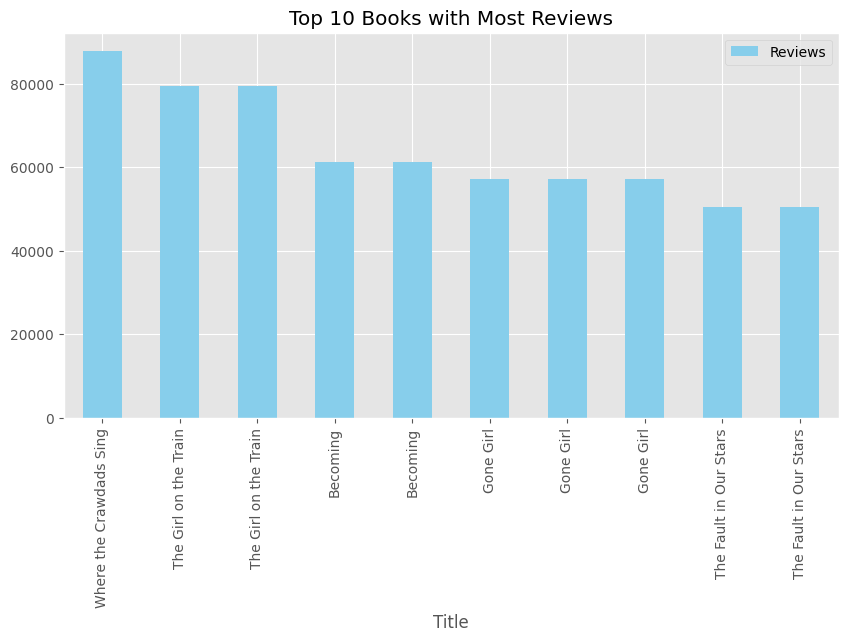

In [148]:
df.sort_values("Reviews",ascending= False). head(10). plot(kind="bar",x="Title", figsize=(10,5),color="skyblue",y="Reviews",title="Top 10 Books with Most Reviews")

In [143]:
df.groupby("Author")["Title"].sum().sort_values(ascending= False). head(10)

,Title
Author,
Jen Sincero,You Are a Badass: How to Stop Doubting Your Gr...
R. J. Palacio,WonderWonderWonderWonderWonder
Geneen Roth,Women Food and God: An Unexpected Path to Almo...
Ken Follett,Winter of the World: Book Two of the Century T...
Cheryl Strayed,Wild: From Lost to Found on the Pacific Crest ...
The Staff of The Late Show with,Whose Boat Is This Boat?: Comments That Don't ...
Maurice Sendak,Where the Wild Things Are
Delia Owens,Where the Crawdads Sing
Paul Kalanithi,When Breath Becomes Air


In [146]:
#groupby name od the book by author
df.groupby("Author")["Title"].unique()

,Title
Author,
Abraham Verghese,[Cutting for Stone]
Adam Gasiewski,[Milk and Vine: Inspirational Quotes From Clas...
Adam Mansbach,[Go the F**k to Sleep]
Adir Levy,[What Should Danny Do? (The Power to Choose Se...
Admiral William H. McRaven,[Make Your Bed: Little Things That Can Change ...
...,...
Walter Isaacson,"[Leonardo da Vinci, Steve Jobs]"
William Davis,"[Wheat Belly: Lose the Wheat, Lose the Weight,..."
William P. Young,[The Shack: Where Tragedy Confronts Eternity]


In [147]:
df.drop(columns=["Price"], inplace=True)

<Axes: title={'center': 'User Rating Distribution'}, ylabel='Density'>

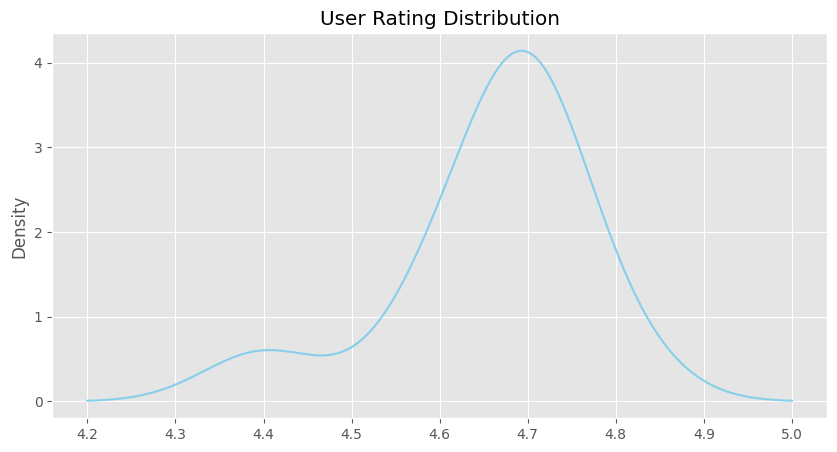

In [151]:
#User Rating Distribution
df["Rating"].head(10).plot(kind="kde",figsize=(10,5),color="skyblue",y="count",title="User Rating Distribution")

<Axes: title={'center': 'Reviews Distribution'}>

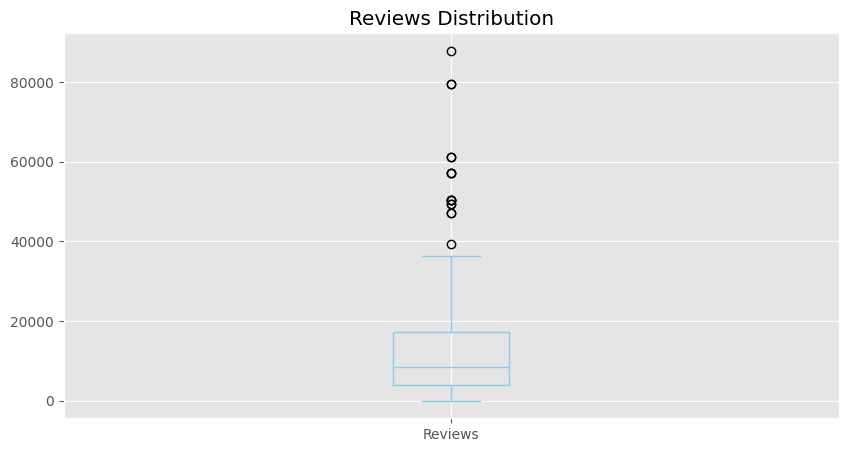

In [156]:
#Reviews Distribution
df["Reviews"].plot(kind="box",figsize=(10,5),color="skyblue",title="Reviews Distribution")

<Axes: title={'center': 'Reviews Vs Rating'}, xlabel='Reviews', ylabel='Rating'>

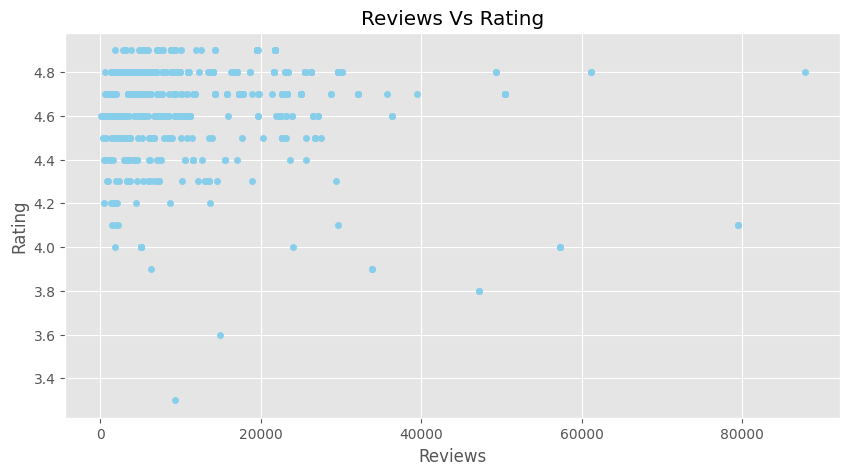

In [161]:
#scatter plot
df.plot(kind="scatter", x= "Reviews",y="Rating", figsize=(10,5),color="skyblue",title="Reviews Vs Rating")

<Axes: title={'center': 'Reviews Vs Rating'}, xlabel='Reviews', ylabel='Rating'>

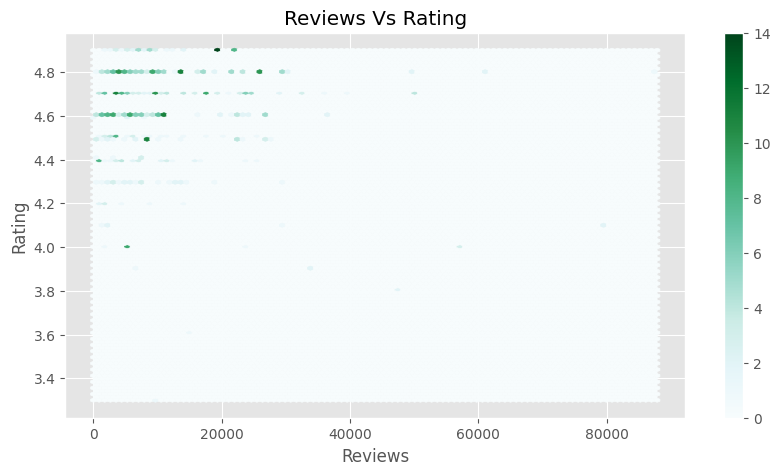

In [163]:
df.plot(kind="hexbin", x= "Reviews",y="Rating", figsize=(10,5),color="skyblue",title="Reviews Vs Rating")

<Axes: >

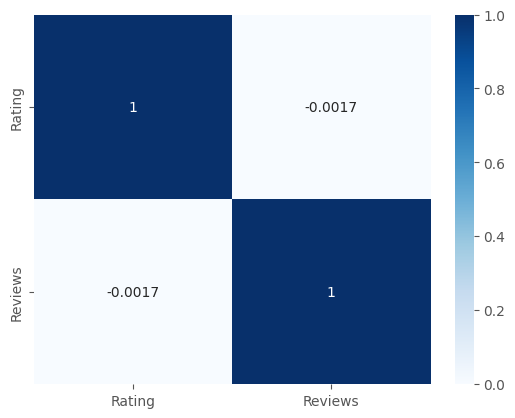

In [181]:
#heatmap for correlation
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="Blues")

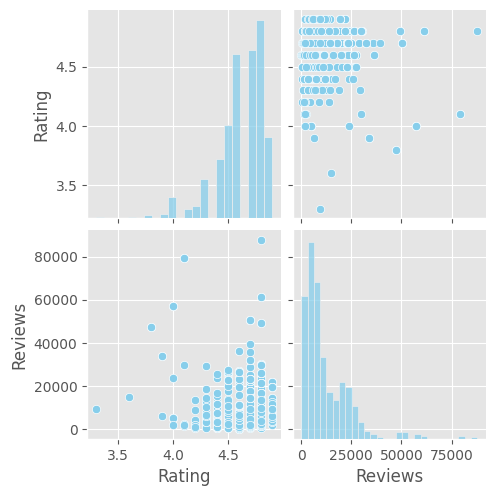

In [189]:
sns.pairplot(
    df,
    plot_kws={"color": "skyblue"},   # scatterplots
    diag_kws={"color": "skyblue"}    # histograms on diagonal
)
plt.show()